In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
data_train=pd.read_csv("C:/Users/Vikash Singh/Desktop/r and python/customer_transaction/trans_pred.csv")

In [4]:
data_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
data_train['target']=data_train['target'].replace(0,'No')
data_train['target']=data_train['target'].replace(1,'Yes')
target=data_train['target']

In [6]:
data_train=data_train.drop(['target','ID_code'],axis=1)

In [7]:
data_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Missing value analysis

In [8]:
missing_val_t=pd.DataFrame(data_train.isnull().sum())
missing_val_t.head()

,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0


### Corelation analysis

Text(0.5, 1.0, 'Pearson Correlation')

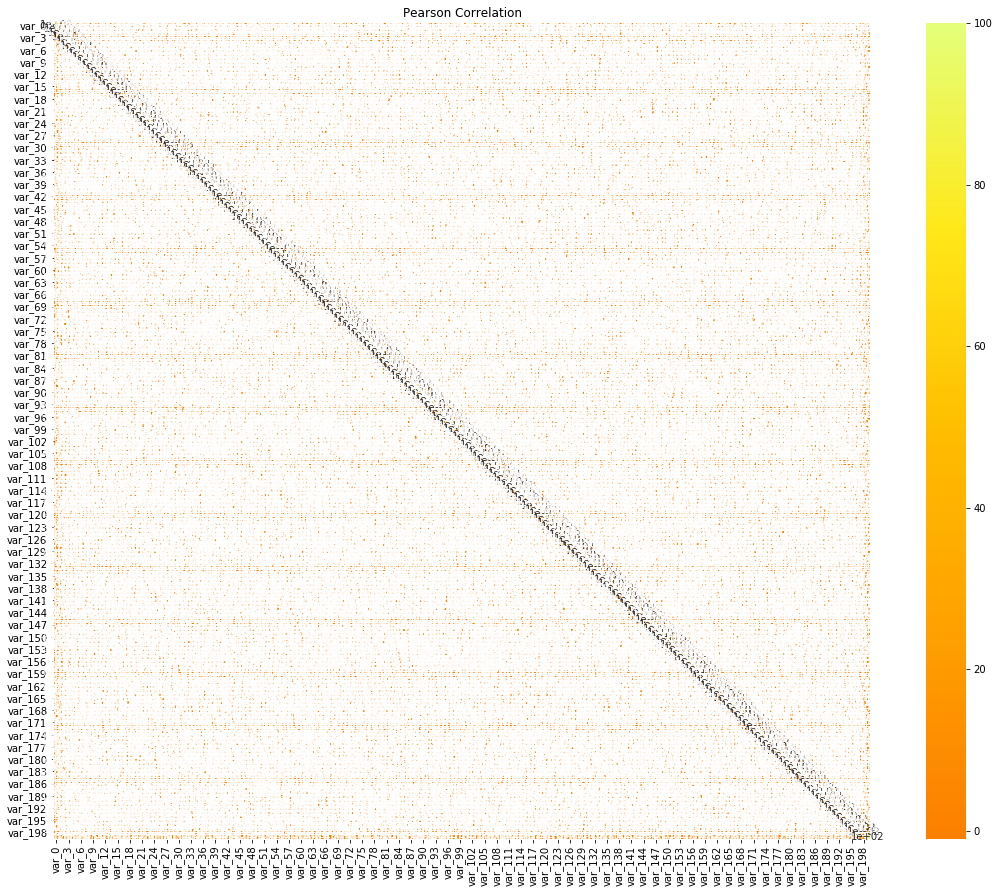

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr()*100, square=True, annot=True, cmap='Wistia_r')
plt.title('Pearson Correlation')

###  Developing model on the top of the data

#### Decision Tree

###### Dividing data into train and test

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix
x = data_train
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160000, 200), (40000, 200), (160000,), (40000,))

#### Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [16]:
dt_pred = clf_gini.predict(x_test)
dt_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score
print("Accuracy score %f" % accuracy_score(y_test,dt_pred))
c=confusion_matrix(y_test,dt_pred)
print(c)

Accuracy score 0.899800
[[35969    29]
 [ 3979    23]]


In [58]:
TP=c[0][0]
FP=c[0][1]
FN=c[1][0]
TN=c[1][1]
print("True Positive: %d"%TP)
print("False Positive: %d"%FP)
print("False Positive: %d"%FN)
print("True Negative: %d"%TN)


True Positive: 35969
False Positive: 29
False Positive: 3979
True Negative: 23


#### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [24]:
print("Accuracy score %f" % accuracy_score(y_test,rf_pred))
confusion_matrix(y_test,rf_pred)

Accuracy score 0.900425


array([[35991,     7],
       [ 3976,    26]], dtype=int64)